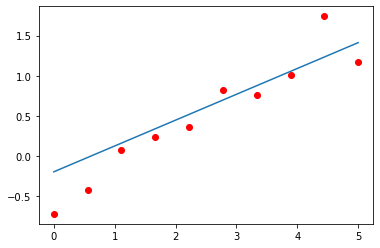

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 10)
xTilde = np.hstack((np.ones((len(x), 1)), x.reshape(-1, 1)))

beta = np.random.normal(0, 1, (2,1))

targets = np.dot(xTilde, beta)

targetsNoisy = targets + np.random.normal(0, 0.3, (len(x), 1))

plt.plot(x, targets)
plt.scatter(x, targetsNoisy, c="r")
plt.show()

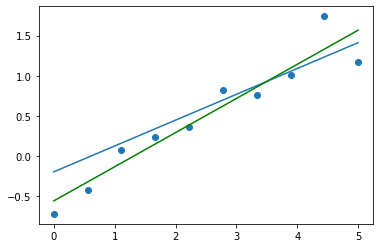

In [2]:
import sklearn.linear_model as sk

myRegression = sk.LinearRegression().fit(x.reshape(-1, 1), targetsNoisy)


xTest = np.linspace(0, 5, 40)
myPrediction = myRegression.predict(xTest.reshape(-1, 1))

plt.plot(x, targets)
plt.scatter(x, targetsNoisy)
plt.plot(xTest, myPrediction, c="g")
plt.show()

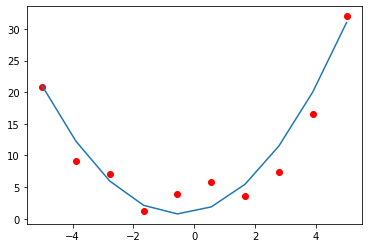

In [3]:
# paraboic data
x = np.linspace(-5, 5, 10)
xTilde = np.hstack((np.ones((len(x), 1)), x.reshape(-1, 1), (x**2).reshape(-1, 1)))

beta = np.array([1, 1, 1])

targets = np.dot(xTilde, beta)

targetsNoisy = targets + np.random.normal(0, 2.4, len(x))

plt.plot(x, targets)
plt.scatter(x, targetsNoisy, c="r")
plt.show()

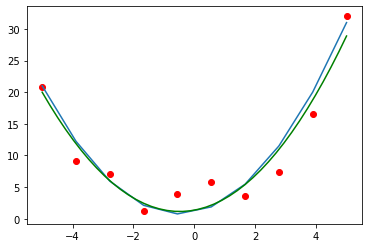

In [4]:
myRegression2 = sk.LinearRegression().fit(xTilde, targetsNoisy)


xTest = np.linspace(-5, 5, 40)
phiTest = np.hstack((np.ones((len(xTest), 1)), xTest.reshape(-1, 1), (xTest**2).reshape(-1, 1)))
myPrediction = myRegression2.predict(phiTest)

plt.plot(x, targets)
plt.scatter(x, targetsNoisy, c="r")
plt.plot(xTest, myPrediction, c="g")
plt.show()

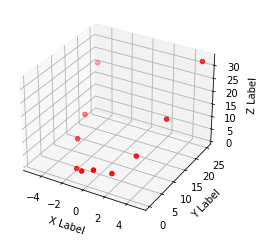

In [5]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(xTilde.T[1], xTilde.T[2], targetsNoisy, c="r")
plt.show()

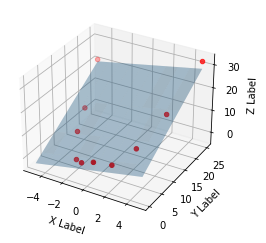

In [6]:
xx, yy = np.meshgrid(xTilde[:, 1], xTilde[:, 2])

xxF = xx.flatten()
yyF = yy.flatten()

xyGrid = np.hstack((np.ones((len(xxF), 1)), xxF.reshape(-1, 1), yyF.reshape(-1, 1)))

prediction = myRegression2.predict(xyGrid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(xTilde.T[1], xTilde.T[2], targetsNoisy, c="r")
ax.plot_surface(xx, yy, np.reshape(prediction, np.shape(xx)), alpha=0.2)
plt.show()

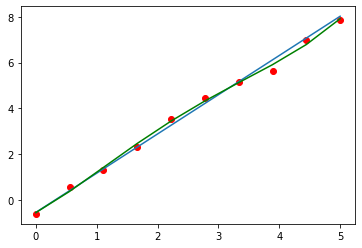

In [9]:
# Test polynomial modeling
from sklearn.preprocessing import PolynomialFeatures

x = np.linspace(0, 5, 10)
xTilde = np.hstack((np.ones((len(x), 1)), x.reshape(-1, 1)))

beta = np.random.normal(0, 1, (2,1))
targets = np.dot(xTilde, beta)
targetsNoisy = targets + np.random.normal(0, 0.3, (len(x), 1))

polynomialFeaturesGenerator = PolynomialFeatures(4)
highDegreeX = polynomialFeaturesGenerator.fit_transform(x.reshape(-1, 1))

# print(highDegreeX)

regressionModel3 = sk.LinearRegression()
regressionModel3.fit(highDegreeX, targetsNoisy)

xTest = np.linspace(0, 5, 100)
xTest = polynomialFeaturesGenerator.fit_transform(xTest.reshape(-1, 1))

prediction = regressionModel3.predict(highDegreeX)

plt.plot(highDegreeX[:,1], targets)
plt.scatter(highDegreeX[:,1], targetsNoisy, c="r")
plt.plot(highDegreeX[:, 1], prediction, c="g")
plt.show()

/home/pedro/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.40028e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


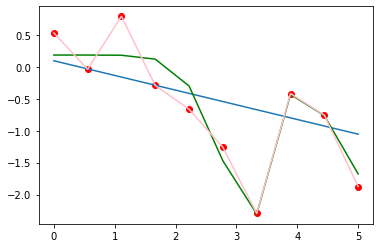

In [8]:
# Test polynomial modeling with weights to degree (regularization)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

x = np.linspace(0, 5, 10)
xTilde = np.hstack((np.ones((len(x), 1)), x.reshape(-1, 1)))

beta = np.random.normal(0, 1, (2,1))
targets = np.dot(xTilde, beta)
targetsNoisy = targets + np.random.normal(0, 0.6, (len(x), 1))

polynomialFeaturesGenerator = PolynomialFeatures(15)
highDegreeX = polynomialFeaturesGenerator.fit_transform(x.reshape(-1, 1))

ridgeModel = Ridge(alpha = 100000)
ridgeModel.fit(highDegreeX, targetsNoisy)

# print(highDegreeX)

regressionModel3 = sk.LinearRegression()
regressionModel3.fit(highDegreeX, targetsNoisy)

xTest = np.linspace(0, 5, 100)
xTest = polynomialFeaturesGenerator.fit_transform(xTest.reshape(-1, 1))

predictionPoly = regressionModel3.predict(highDegreeX)
predictionRidge = ridgeModel.predict(highDegreeX)

plt.plot(highDegreeX[:,1], targets)
plt.scatter(highDegreeX[:,1], targetsNoisy, c="r")
plt.plot(highDegreeX[:, 1], predictionRidge, c="g")
plt.plot(highDegreeX[:, 1], predictionPoly, c="pink")
plt.show()